In [1]:
from pcg_gazebo.generators import WorldGenerator
from pcg_gazebo.visualization import plot_workspace, plot_occupancy_grid

world_gen = WorldGenerator()

Add a dynamic box generator to the list of assets. Dynamic boxes have a mass and moments of inertia.

In [2]:
world_gen.add_asset(
    tag='dyn_box',
    description=dict(
        type='box',
        args=dict(
            size="10 * __import__('numpy').random.random(3)",
            name='cuboid',
            mass="max(0.1, __import__('numpy').random.random())",
            color='xkcd'
        )
    )
)

# Check if models where included correctly
print('Assets available for world generation=', world_gen.assets.tags)

Assets available for world generation= ['dyn_box', 'cardboard_box', 'arm_part', 'euro_pallet', 'walls', 'speed_limit_sign', 'mobile_base', 'OrangeDoors', 'sun', 'ground_plane', 'hinged_door']


In [3]:
world_gen.add_asset(
    tag='static_cylinder',
    description=dict(
        type='cylinder',
        args=dict(
            length="10 * __import__('numpy').random.random(3)",
            radius="10 * __import__('numpy').random.random(3)",
            name='cylinder',
            color='xkcd'
        )
    )
)

# Check if models where included correctly
print('Assets available for world generation=', world_gen.assets.tags)

Assets available for world generation= ['dyn_box', 'static_cylinder', 'cardboard_box', 'arm_part', 'euro_pallet', 'walls', 'speed_limit_sign', 'mobile_base', 'OrangeDoors', 'sun', 'ground_plane', 'hinged_door']


Add a constraint to ensure all boxes are placed on top of ground plane

In [4]:
world_gen.add_constraint(
    name='tangent_to_ground_plane',
    type='tangent',
    frame='world',
    reference=dict(
        type='plane',
        args=dict(
            origin=[0, 0, 0],
            normal=[0, 0, 1]
        )
    )
)

print('List of constraints=', list(world_gen.constraints.tags))

List of constraints= ['tangent_to_ground_plane']


Add 2D workspace constraint defining where the boxes should be spawned in the world

List of constraints= ['tangent_to_ground_plane', 'my_workspace']
plot_shapely_geometry
axis equal and grid


(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe9007dfe48>)

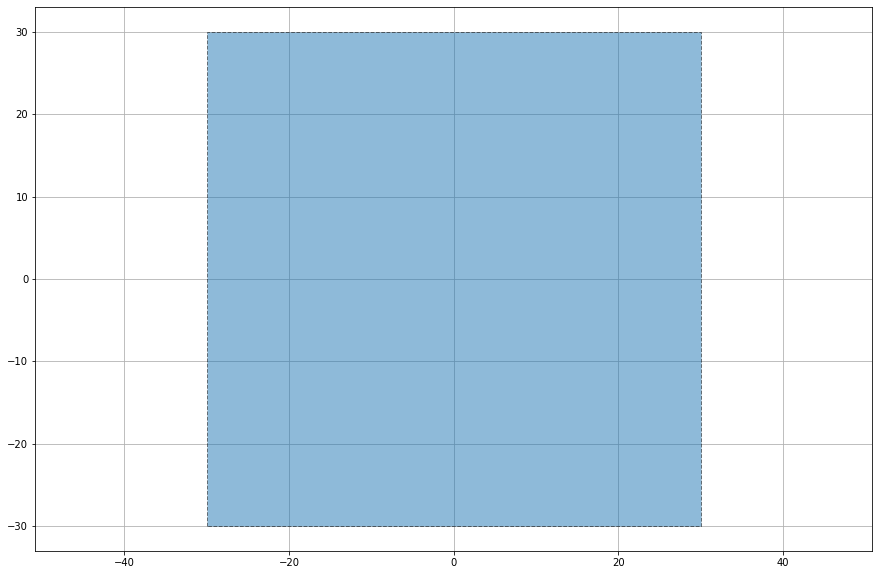

In [5]:
world_gen.add_constraint(
    name='my_workspace',
    type='workspace',
    frame='world',
    geometry=dict(
        type='area',
        description=dict(
            points=[
                [-30, -30, 0],
                [-30, 30, 0],
                [30, 30, 0],
                [30, -30, 0],
            ]
        )
    )
)

print('List of constraints=', list(world_gen.constraints.tags))

plot_workspace(workspace=world_gen.constraints.get('my_workspace'))

Add ground plane and the sun

In [6]:
world_gen.add_engine(
    engine_name='fixed_pose',
    tag='gp_engine',
    models=['ground_plane'],
    poses=[[0 for _ in range(6)]])
world_gen.set_model_as_ground_plane('ground_plane')
world_gen.add_engine(
    engine_name='fixed_pose',
    tag='sun_engine',
    models=['sun'],
    poses=[[0, 0, 10, 0, 0, 0]])

Add a random pose engine to place the boxes in the world

In [7]:
NUM_BOXES = 10
NUM_CYLINDER = 10

box_placement_policy = dict(
    models=['dyn_box', 'static_cylinder'],
    config=[
        dict(
            dofs=['x', 'y'],
            policy=dict(
                name='workspace',
                args='my_workspace'
            )
        ),
        dict(
            dofs=['yaw'],
            policy=dict(
                name='uniform',
                args=dict(
                    mean=0,
                    min=-3.141592653589793,
                    max=3.141592653589793
                )
            )
        )
    ]
)

world_gen.add_engine(
    tag='box_placement',
    engine_name='random_pose',
    models=['dyn_box', 'static_cylinder'],
    max_num=dict(
        dyn_box=NUM_BOXES,
        static_cylinder=NUM_CYLINDER),
    model_picker='random',
    no_collision=True,
    policies=[box_placement_policy],
    constraints=[
        dict(
            model='dyn_box',
            constraint='tangent_to_ground_plane'),
        dict(
            model='static_cylinder',
            constraint='tangent_to_ground_plane')
    ]
)

Run the engines to generate the world

In [8]:
world_gen.run_engines()

True

In [9]:
print(world_gen.world.models.keys())

dict_keys(['ground_plane', 'dyn_box', 'dyn_box_1', 'static_cylinder', 'dyn_box_2', 'dyn_box_3', 'static_cylinder_1', 'static_cylinder_2', 'static_cylinder_3', 'static_cylinder_4', 'static_cylinder_5', 'dyn_box_4', 'dyn_box_5', 'static_cylinder_6', 'dyn_box_6', 'static_cylinder_7', 'dyn_box_7', 'static_cylinder_8', 'static_cylinder_9', 'dyn_box_8', 'dyn_box_9'])


In [10]:
world_gen.world.show()

SceneViewer(width=1920, height=1025)

Next the grid map can be generated. It is important to check if the dynamic models should be included in the plot. 
That can be done using the `static_models_only` input.
The example below shows a grid map with both dynamic and static models. 

In [11]:
import matplotlib.pyplot as pyplot
fig = plot_occupancy_grid(
    world_gen.world.models,
    with_ground_plane=False,
    static_models_only=False)
pyplot.show()

TopologyException: found non-noded intersection between LINESTRING (-2.4789 3.34781, -2.53072 2.92161) and LINESTRING (-2.53072 2.92161, -2.4789 3.34781) at -2.528030364755546 2.9437362209765565


ValueError: No Shapely geometry can be created from null value

The example below shows a grid map with only static models. 

In [ ]:
fig = plot_occupancy_grid(
    world_gen.world.models,
    with_ground_plane=False,
    static_models_only=True)
pyplot.show()